##  PCA ( Principal Component Analysis)  
###  Dimession reduction

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [5]:
iris = load_iris()
y = iris.target
X = iris.data

X.shape


(150, 4)

In [57]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:

import pandas as pd
pd.DataFrame(X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
pca = PCA(n_components=2) #实例化
pca = pca.fit(X) #拟合模型
X_transformed = pca.transform(X) #获取新矩阵


In [41]:
X_transformed.shape

(150, 2)

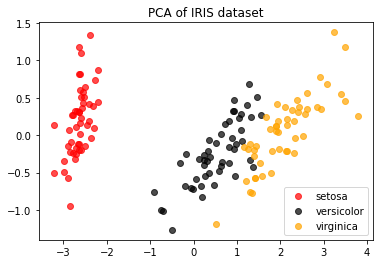

In [42]:
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_transformed[y == i, 0]
               ,X_transformed[y == i, 1]
               ,alpha=.7
               ,c=colors[i]
               ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [43]:
print(pca.explained_variance_)

[4.22824171 0.24267075]


In [44]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


###  classification on low dimentaional data

In [ ]:
## retest classifcation with logicstic regression and KNN for iris data

In [45]:
##  prepare the testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_pca, y = X_transformed, iris.target # replace original data by data_pca1

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.25, random_state=0)

In [46]:
##  use logicstic Regression to retest
model = LogisticRegression(max_iter=200)



In [47]:
model.fit(X_train_pca, y_train_pca)

LogisticRegression(max_iter=200)

In [48]:
model.coef_

array([[-2.62721487,  0.8773852 ],
       [-0.27282696,  0.28549201],
       [ 2.90004184, -1.16287721]])

In [49]:
model.intercept_

array([-0.51715311,  2.29305876, -1.77590565])

In [32]:
predict = model.predict(X_test_pca)

In [50]:
print("model accuracy", accuracy_score(y_test_pca, predict) )

model accuracy 0.9736842105263158


In [53]:
# prediction on unseen data
X_unseen = [[4.95, 3.1, 1.4, 0.3]] # what is this?


X_unseen_tr = pca.transform(X_unseen) 

X_unseen_tr

array([[-2.66869569, -0.07870375]])

In [58]:
pred = model.predict(X_unseen_tr)
print(pred)

target_name_array = np.array(iris.target_names)
print( target_name_array[pred])

[0]
['setosa']


In [59]:

##  using KNN to test lower dimenstional data


In [60]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5) # knn
model_knn.fit(X_train_pca, y_train_pca)


KNeighborsClassifier()

In [61]:
X_unseen = [[4.95, 3.1, 1.4, 0.3]] # what is this?

X_unseen_tr = pca.transform(X_unseen) 

pred = model_knn.predict(X_unseen_tr)
print(pred)

target_name_array = np.array(iris.target_names)
print( target_name_array[pred])

[0]
['setosa']


##  Another example of PCA

In [16]:
from sklearn.datasets import load_digits
digits = load_digits() 
digits.data.shape

(1797, 64)

In [17]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA() # keep all components, so that we can plot the graph later
pca.fit(digits.data)



PCA()

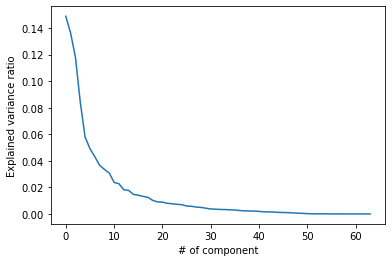

In [19]:
## diagram 1
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of component')
plt.ylabel('Explained variance ratio');



Text(0, 0.5, 'Cumulative explained variance')

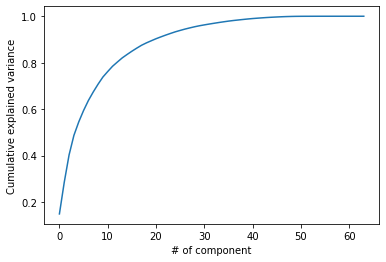

In [20]:
# diagram 2
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of component')
plt.ylabel('Cumulative explained variance')

In [21]:
%%time

# originally there are 8x8 features

# method 1 (set number of components to keep)
pca1 = PCA(n_components=30) # number of components to keep (the most important one)
data_transformed = pca1.fit_transform(digits.data) # unsupervised learning

# print(f'# of column (original): {digits.data.shape}') # originally we have 64 column
# print(f'# of column (after pca1): {data_transformed.shape}') # originally we have 64 column

# pca1.explained_variance_ # variances for each components retained
# pca1.explained_variance_ratio_ # components' variance ratio (no drop)
ev_sum = sum(pca1.explained_variance_ratio_) # the total % of variances preserved
ev_sum # 0.959

CPU times: total: 93.8 ms
Wall time: 24.6 ms


0.9590768116327045

In [22]:
%%time

# method 2 (set the variance ratio that we want to preserve)
pca2 = PCA(n_components=0.959)
data_transformed = pca2.fit_transform(digits.data)

print(f'# of column (original): {digits.data.shape}') # originally we have 64 column
print(f'# of column (after pca2): {data_transformed.shape}') # originally we have 64 column
ev_sum = sum(pca2.explained_variance_ratio_) # the total % of variances preserved
ev_sum # 0.959

# of column (original): (1797, 64)
# of column (after pca2): (1797, 30)
CPU times: total: 0 ns
Wall time: 4.61 ms


0.9590854042457173